# CUSTOMER CHURN PREDICTION

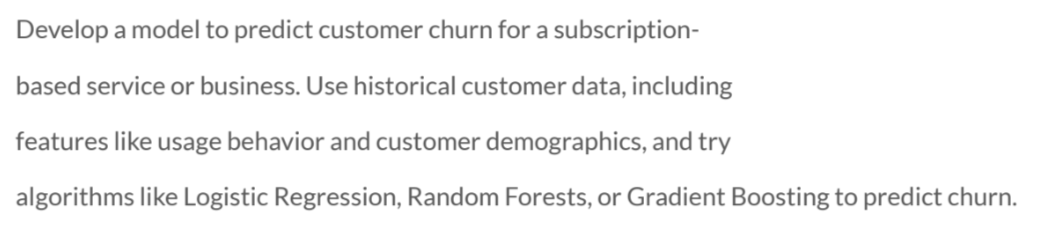

**IMPORT LIBRARIES**

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn 

**LOADING DATASET**

In [51]:
df = pd.read_csv("Churn_Modelling.csv")

**EXPLORATORY DATA ANALYSIS**

In [52]:
df.shape

(10000, 14)

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [55]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**DATA CLEANING**

In [56]:
df =  df.drop(['RowNumber','Surname','Geography','Gender'],axis=1)

In [57]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


**VISUALIXATION**

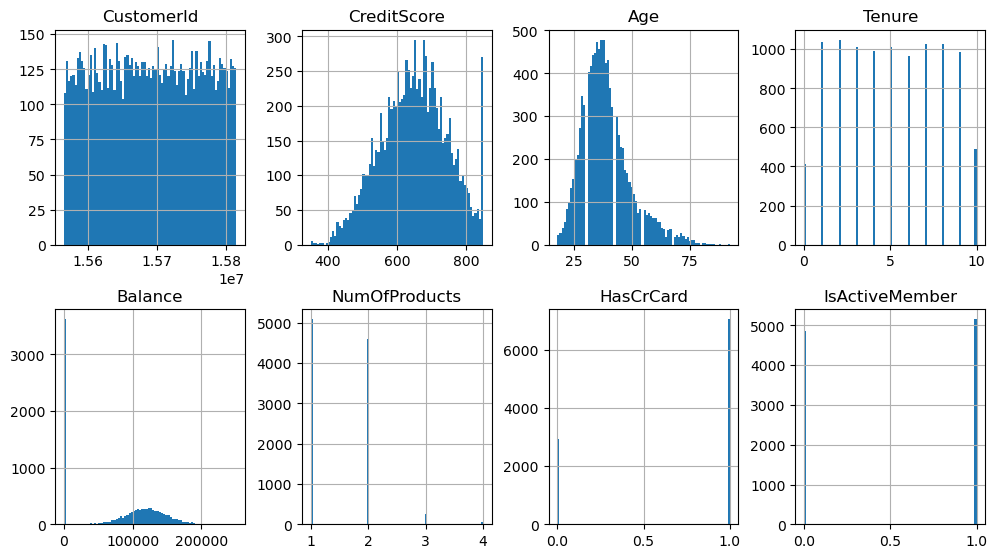

In [58]:
columns = list(df)[0:8]
df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))
plt.show()

In [59]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<IPython.core.display.Javascript object>

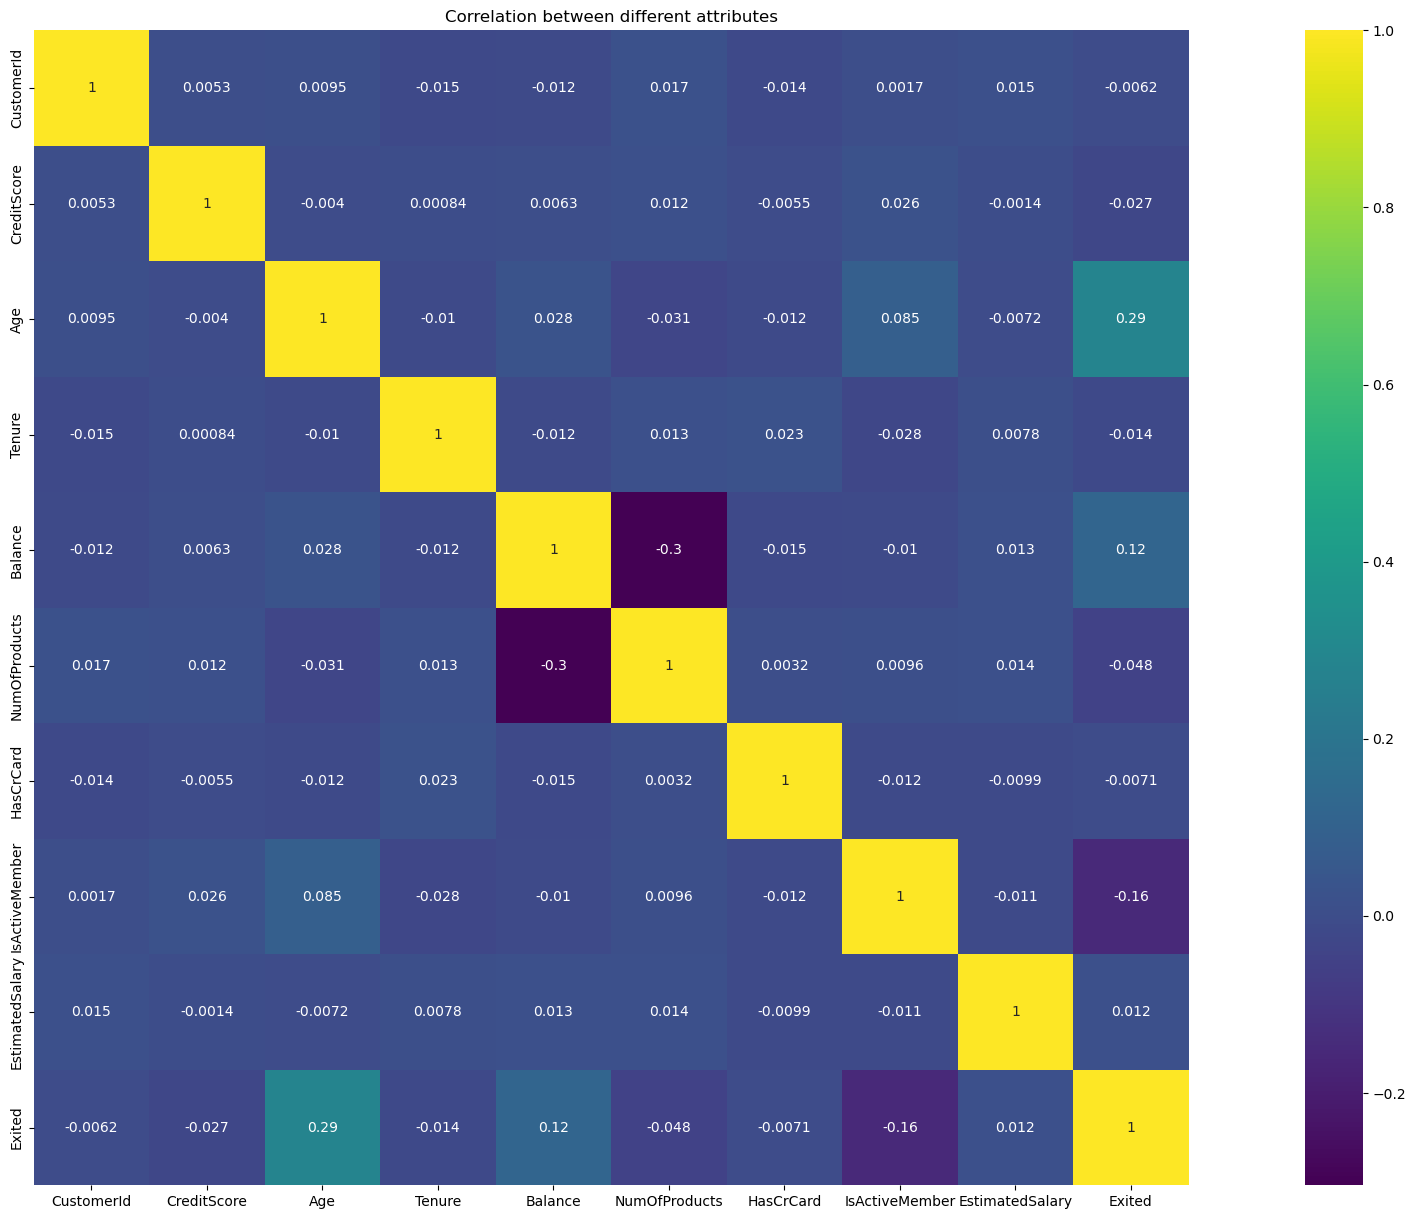

In [60]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

<IPython.core.display.Javascript object>

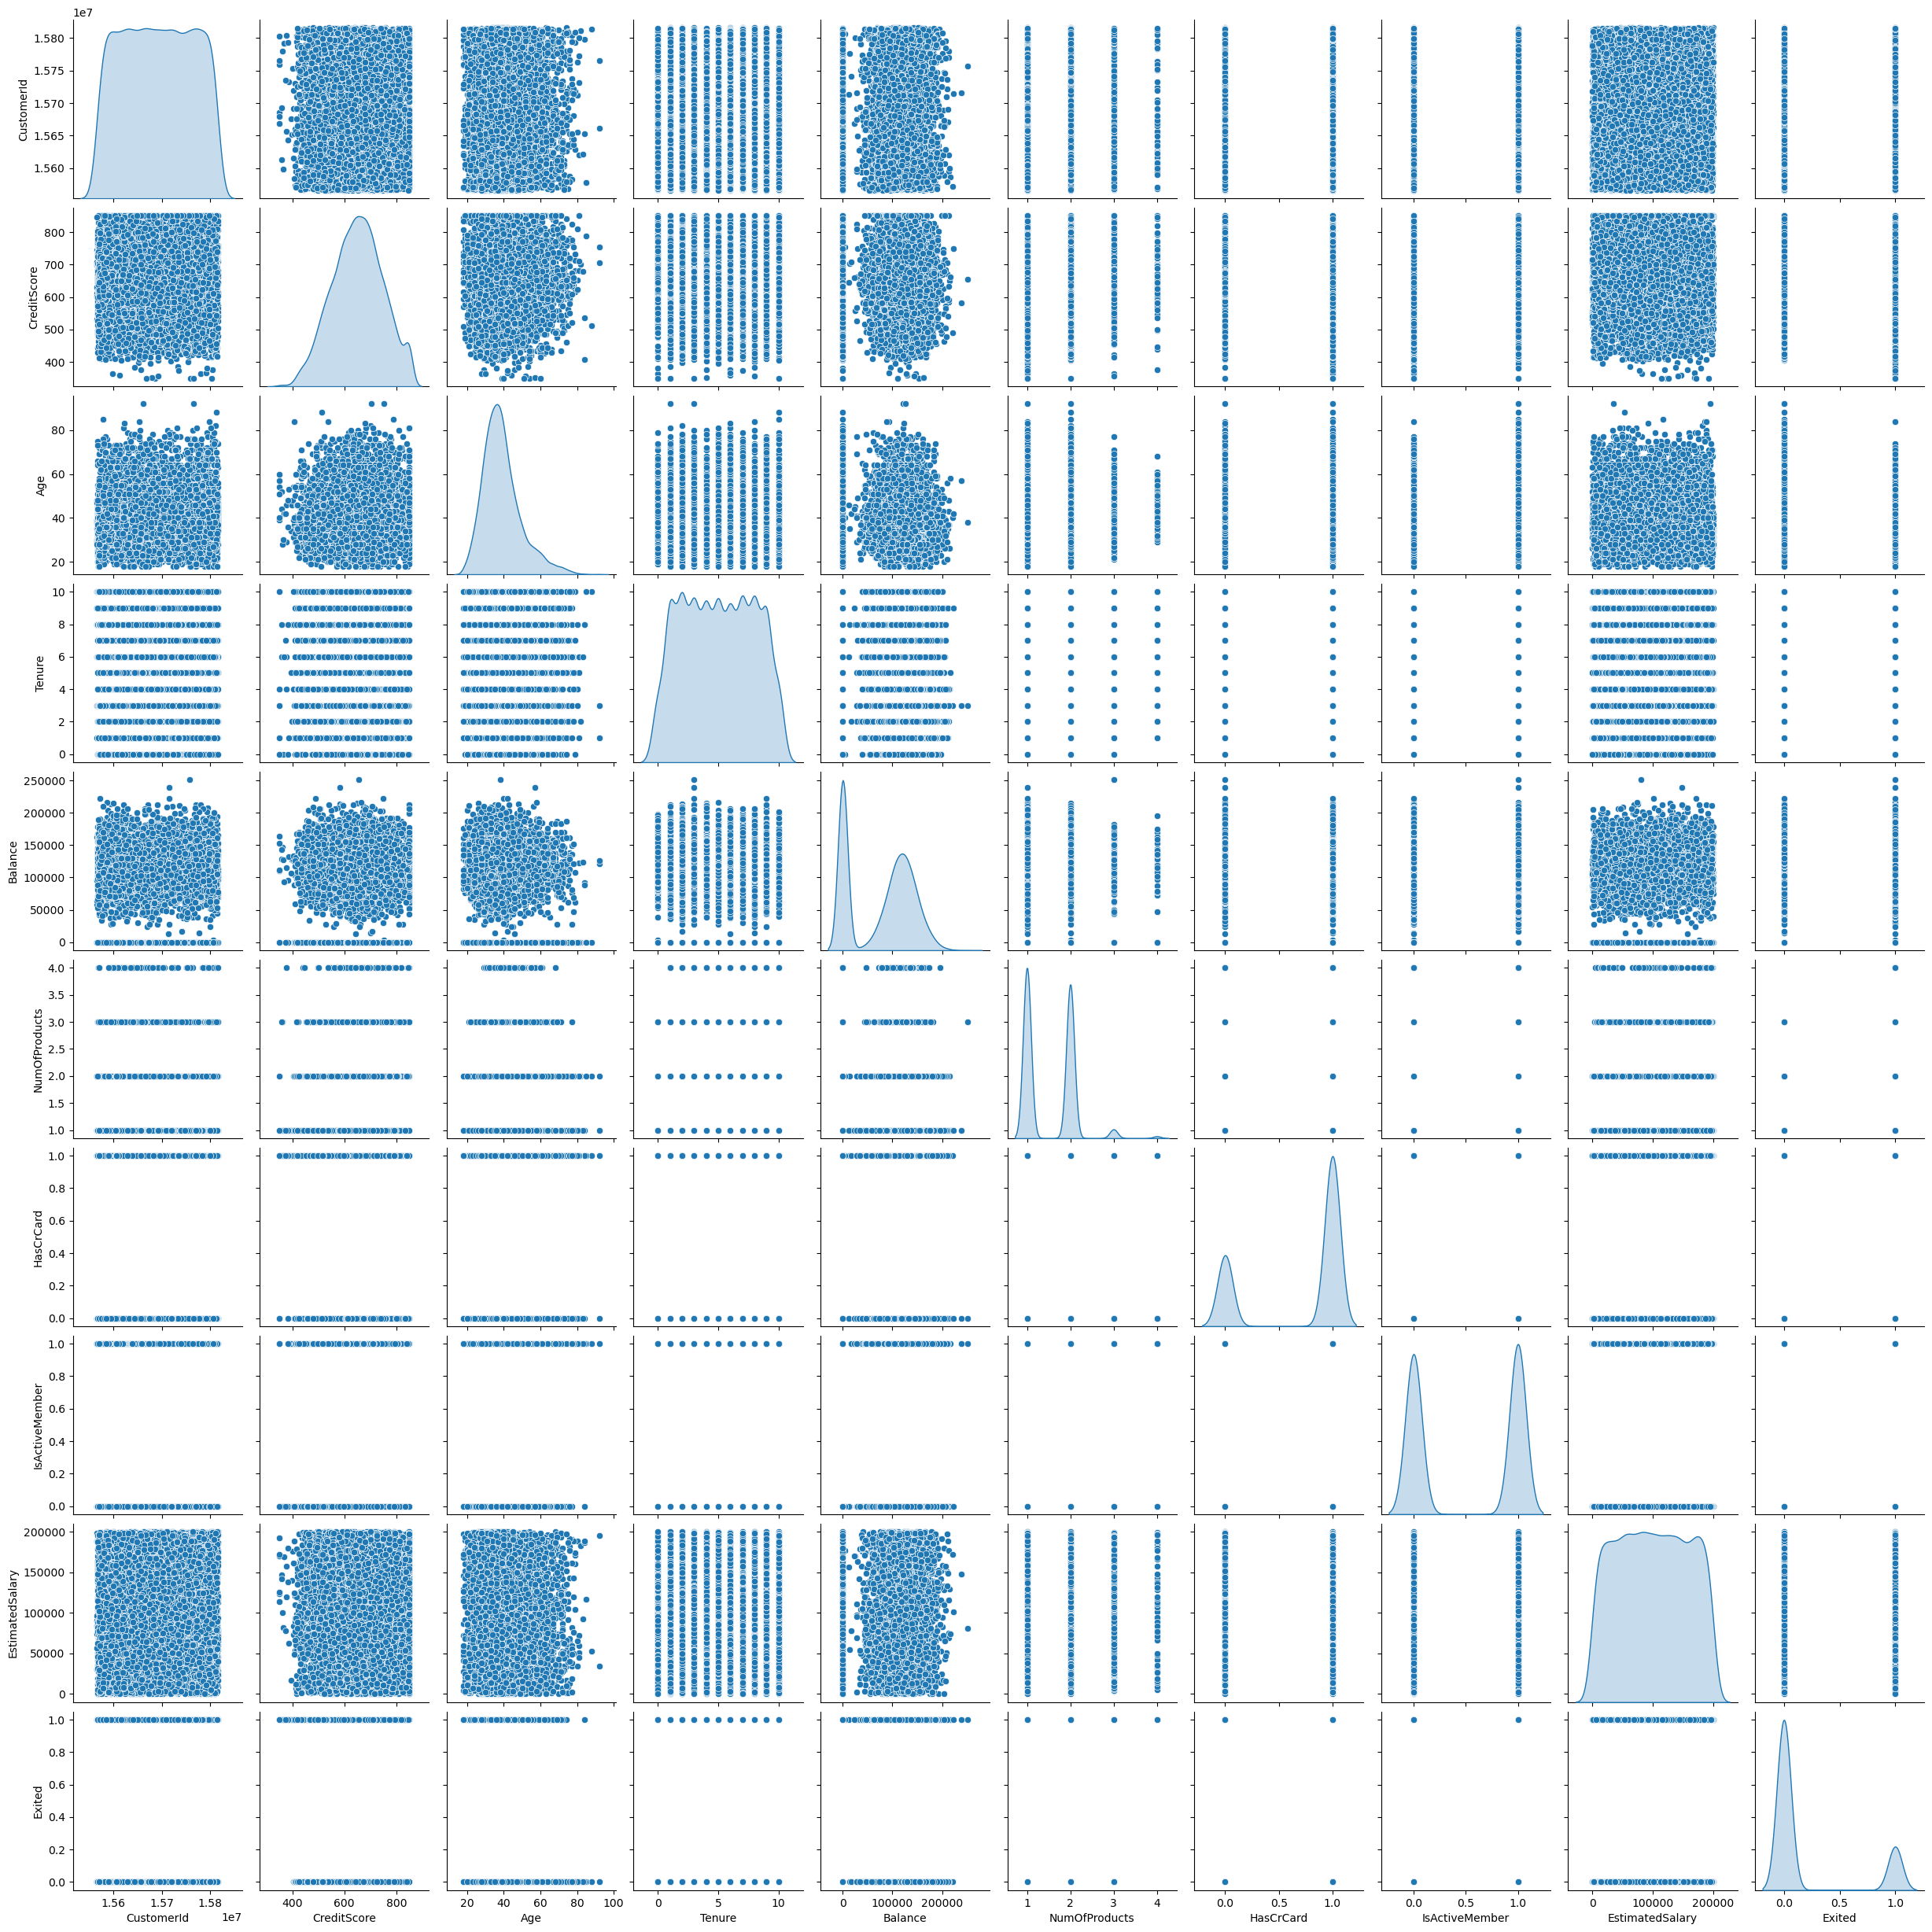

In [61]:
sns.pairplot(df,diag_kind='kde')
plt.show() 

**SPLITTING DATA**

In [62]:
x = df.drop('IsActiveMember',axis = 1)
y = df['IsActiveMember']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1, test_size = 0.3)

In [65]:
x_train.shape

(7000, 9)

In [66]:
y_train.shape

(7000,)

In [67]:
x_test.shape

(3000, 9)

In [68]:
y_test.shape

(3000,)

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [70]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [78]:
logistic_predict = lr.predict(x_test)
logistic_predict
print(lr.score(x_test,y_test))

0.5263333333333333


<IPython.core.display.Javascript object>

<Axes: >

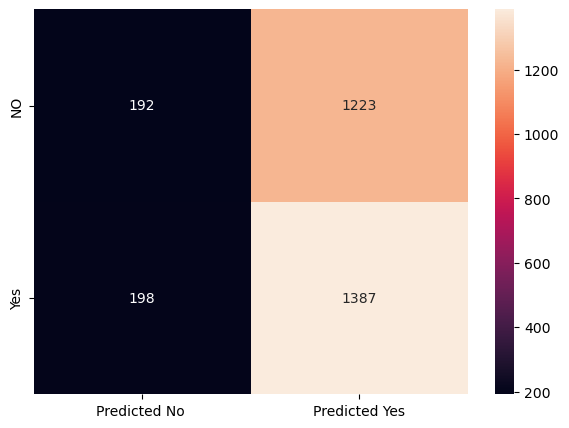

In [79]:
cm = metrics.confusion_matrix(y_test,logistic_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

**RANDOM FOREST**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50 , random_state = 1 , max_features =12)
rfcl = rfcl.fit(x_train,y_train)

In [81]:
rfcl_predict = rfcl.predict(x_test)
print(rfcl.score(x_test,y_test))

0.555


<IPython.core.display.Javascript object>

<Axes: >

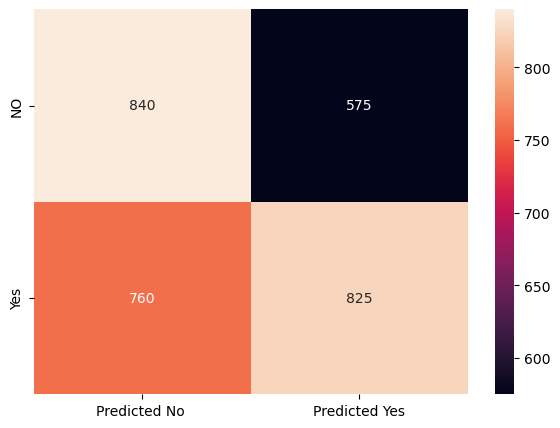

In [82]:
cm = metrics.confusion_matrix(y_test,rfcl_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

**GRADIENT BOOSTING**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl = gbcl.fit(x_train,y_train)

In [84]:
gbcl_predict = gbcl.predict(x_test)
print(gbcl.score(x_test,y_test))

0.572


<IPython.core.display.Javascript object>

<Axes: >

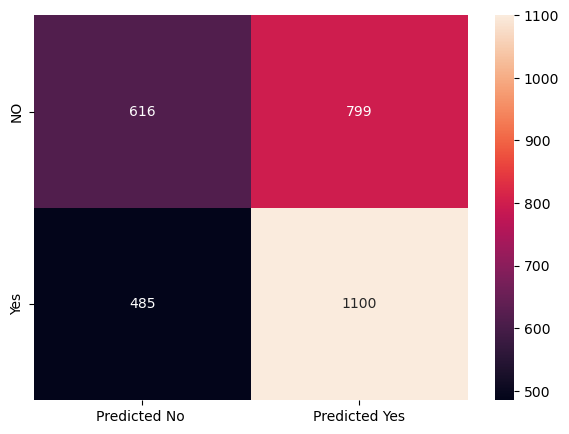

In [85]:
cm = metrics.confusion_matrix(y_test,gbcl_predict,labels=[0,1])
      
df_cm = pd.DataFrame(cm,index=[i for i in ["NO","Yes"]],
                     columns = [i for i in ["Predicted No ","Predicted Yes"]])
                                            
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')